In [50]:
# load libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import os
import datetime
import string
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [51]:
archive = pd.read_csv('twitter-archive-enhanced.csv', encoding="utf-8")
archive
df1 = archive
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [52]:
#download file using get method 
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
r

<Response [200]>

In [53]:
#save tsv file
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)

In [54]:
#read tsv file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction
df2 = image_prediction
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


I attempted to create a Twitter developer account in order to access the Twitter API. However, my application was rejected. Hence, I had to use the json file provided by the Udacity instructor.

In [55]:
#Import and load libraries for quering Twitter data via Twitter's API
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [56]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [57]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'tweet_ids' is not defined

Save json file in a dataframe

In [58]:
df2_list = []

with open('tweet-json copy', 'r', encoding='utf8') as file:
    for line in file:
        lines = json.loads(line)
        df2_list.append({'tweet_id': lines['id'],
                        'favorites': lines['favorite_count'],
                        'retweets': lines['retweet_count'],
                        'timestamp': lines['created_at']})
tweet = pd.DataFrame(df2_list, columns=['tweet_id','timestamp','favorites','retweets'])
df3 = tweet

In [59]:
df3.head()

,tweet_id,timestamp,favorites,retweets
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774


# Assessing Data

**In this step the gathered data will be assessed**

Assessing **twitter-archive-enhanced.csv** aka **df1**

In [60]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [62]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Assessing **image_predictions** aka **df2**

In [63]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Assessing **tweet-json** aka **df3**

In [66]:
df3.head()

,tweet_id,timestamp,favorites,retweets
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774


In [67]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   int64 
 1   timestamp  2354 non-null   object
 2   favorites  2354 non-null   int64 
 3   retweets   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [68]:
df3.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### Quality Issues:

* drop unnecessary columns from archive table such as the various id columns
* retweeted_status_timestamp should be datetime as opposed to string
* incorrect names or NA in name column 
* the values for rating_numerator and rating_denominator are occasionally incorrect
* missing column for fraction of rating_numertor and denominator 
* expanded_urls column: tweets/retweets without images
* img_num column does not contain any information of value 
* in all three dataframes the dog breeds are not consistently formatted - sometimes lower or uppercase

### Tidiness Issues:
* df1, df2, df3 need to be joined
* 4 columns (dogger, floofer, pupper and puppo) for one variable (dog stage) hence could have been included into one column
* the column headers of the four dog stages should be saved as categorical

## Cleaning Data


In [96]:
#created copies of the three dataframes
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

**Define**
extract decimal ratings from twitter archive enhanced

**Code**

In [132]:
df1_copy[df1_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


**Test**

In [134]:
df1_copy.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1313,706904523814649856,NaN,NaN,2016-03-07 18:09:06 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Ever seen a dog pet another dog? Both 13/10 tr...,NaN,NaN,NaN,https://vine.co/v/iXQAm5Lrgrh,13,10,None,None,None,None,None
1060,741438259667034112,NaN,NaN,2016-06-11 01:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's still figuring out couche...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741438259...,9,10,Tucker,None,None,None,None
928,754747087846248448,NaN,NaN,2016-07-17 18:38:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's pursuing a more 2D lifesty...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754747087...,12,10,Keith,None,None,None,None
2007,672264251789176834,NaN,NaN,2015-12-03 04:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He has the eyes of a tyrannical ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672264251...,10,10,Kreg,None,None,None,None
548,805487436403003392,NaN,NaN,2016-12-04 19:02:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sansa and Gary. They run along the fence ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805487436...,12,10,Sansa,None,None,None,None
1644,683852578183077888,NaN,NaN,2016-01-04 03:28:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Tiger. He's a penbroke (little do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683852578...,10,10,Tiger,None,None,None,None
694,786729988674449408,NaN,NaN,2016-10-14 00:47:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oakley. He has no idea ...,7.594477e+17,4.196984e+09,2016-07-30 17:56:51 +0000,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None
1954,673656262056419329,NaN,NaN,2015-12-07 00:12:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673656262...,10,10,Albert,None,None,pupper,None
1885,674793399141146624,6.717299e+17,4.196984e+09,2015-12-10 03:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have found another. 13/10 https://t.co/HwroP...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674793399...,13,10,None,None,None,None,None
1092,737322739594330112,NaN,NaN,2016-05-30 16:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's not injured or anythi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737322739...,9,10,Lily,None,None,None,None


**Define**

joining the three dataframes

**Code**

In [113]:
#join the three dataframes
df4 = pd.merge(df1_copy, df2_copy, left_on='tweet_id', right_on='tweet_id', how='inner')
df5 = pd.merge(df4, df3_copy, left_on='tweet_id', right_on='tweet_id', how='inner')
df5_copy = df5

**Test**

In [114]:
#test if joined
df5_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp_x                 2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

**Define**

Drop columns that are of no interest for this analysis

**Code**

In [115]:
drop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
             'retweeted_status_user_id','retweeted_status_timestamp',
             'rating_numerator', 'rating_denominator',
             'p1_conf','p1_dog', 'p2_conf','p2_dog', 'p3_conf','p3_dog','timestamp_y']
df5_copy.drop(drop, axis=1, inplace=True)
df5_copy.rename(columns={'timestamp_x': 'timestamp'}, inplace=True)

**Test**

In [116]:
df5_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2073 non-null   int64 
 1   timestamp      2073 non-null   object
 2   source         2073 non-null   object
 3   text           2073 non-null   object
 4   expanded_urls  2073 non-null   object
 5   name           2073 non-null   object
 6   doggo          2073 non-null   object
 7   floofer        2073 non-null   object
 8   pupper         2073 non-null   object
 9   puppo          2073 non-null   object
 10  jpg_url        2073 non-null   object
 11  img_num        2073 non-null   int64 
 12  p1             2073 non-null   object
 13  p2             2073 non-null   object
 14  p3             2073 non-null   object
 15  favorites      2073 non-null   int64 
 16  retweets       2073 non-null   int64 
dtypes: int64(4), object(13)
memory usage: 291.5+ KB


**Define**
Adjusting data types

**Code**

In [117]:
df5_copy['tweet_id'] = df5_copy['tweet_id'].astype(str)
df5_copy['timestamp'] = pd.to_datetime(df5_copy['timestamp'])

#For the sake of later analysis I will transform source and img_num as categorical

df5_copy['source'] = df5_copy['source'].astype('category')
df5_copy['img_num'] = df5_copy['img_num'].astype('category')

**Test**

In [118]:
df5_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2073 non-null   object             
 1   timestamp      2073 non-null   datetime64[ns, UTC]
 2   source         2073 non-null   category           
 3   text           2073 non-null   object             
 4   expanded_urls  2073 non-null   object             
 5   name           2073 non-null   object             
 6   doggo          2073 non-null   object             
 7   floofer        2073 non-null   object             
 8   pupper         2073 non-null   object             
 9   puppo          2073 non-null   object             
 10  jpg_url        2073 non-null   object             
 11  img_num        2073 non-null   category           
 12  p1             2073 non-null   object             
 13  p2             2073 non-null   object           

**Define**

Handle None, Coalesce the four dog stages column into one, handle multiple stages and the missing values

**Code**

In [119]:
# handle none
df5_copy.doggo.replace('None', '', inplace=True)
df5_copy.floofer.replace('None', '', inplace=True)
df5_copy.pupper.replace('None', '', inplace=True)
df5_copy.puppo.replace('None', '', inplace=True)

# merge into column
df5_copy['dog_stage'] = df5_copy.doggo + df5_copy.floofer + df5_copy.pupper + df5_copy.puppo

# handle multiple stages
df5_copy.loc[df5_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df5_copy.loc[df5_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df5_copy.loc[df5_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df5_copy.loc[df5_copy.dog_stage == '', 'dog_stage'] = np.nan

**Test**

In [120]:
df5_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2073 non-null   object             
 1   timestamp      2073 non-null   datetime64[ns, UTC]
 2   source         2073 non-null   category           
 3   text           2073 non-null   object             
 4   expanded_urls  2073 non-null   object             
 5   name           2073 non-null   object             
 6   doggo          2073 non-null   object             
 7   floofer        2073 non-null   object             
 8   pupper         2073 non-null   object             
 9   puppo          2073 non-null   object             
 10  jpg_url        2073 non-null   object             
 11  img_num        2073 non-null   category           
 12  p1             2073 non-null   object             
 13  p2             2073 non-null   object           

**Define**

Now we delete the unnecessary html structure 

**Code**

In [121]:
import re
df5_copy['source'] = df5_copy['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

**Test**

In [122]:
df5_copy['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

**Define**

Now we are going to use regex again to extract the numbers in the rating_denominator and rating_numerator column. 

**Code**

In [123]:
regex1 = '(\d+\.?\d*\/{1}\d+)'
regex2 = '(\.{1}\d+)'

rating_new = df5_copy.text.tolist()
df5_copy['rating'] = [re.sub(regex2, '', re.findall(regex1, x)[-1]) for x in rating_new]

**Test**

In [124]:
df5_copy['rating']

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2068     5/10
2069     6/10
2070     9/10
2071     7/10
2072     8/10
Name: rating, Length: 2073, dtype: object

Now we calculate the rating by extracting the denominator and numerator and divide them. Furthermore, some ratings are in decimal numbers, hence we will use create a float data type. 

**Code**

In [125]:
rating_df = df5_copy.rating.str.extract('(\d+\.?\d*\/)')
rating_scores = rating_df[0].str.strip('/')
df5_copy['rating'] = rating_scores.astype(float)

**Test**

In [83]:
df5_copy['rating']

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2068     5.0
2069     6.0
2070     9.0
2071     7.0
2072     8.0
Name: rating, Length: 2073, dtype: float64

**Define**
Remove missing values

In [84]:
df5_copy.dropna(subset=['expanded_urls'], inplace=True)

**Test**

In [85]:
df5_copy['expanded_urls'].isnull().sum()

0

**Define**

Transform dog breed names into upper case

In [86]:
df5_copy['p1'] = df5_copy['p1'].str.upper()
df5_copy['p2'] = df5_copy['p2'].str.upper()
df5_copy['p3'] = df5_copy['p3'].str.upper()

**Test**

In [87]:
df5_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p2,p3,favorites,retweets,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,ORANGE,BAGEL,BANANA,39467,8853,NaN,13.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,CHIHUAHUA,PEKINESE,PAPILLON,33819,6514,NaN,13.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,CHIHUAHUA,MALAMUTE,KELPIE,25461,4328,NaN,12.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,PAPER_TOWEL,LABRADOR_RETRIEVER,SPATULA,42908,8964,NaN,13.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,BASSET,ENGLISH_SPRINGER,GERMAN_SHORT-HAIRED_POINTER,41048,9774,NaN,12.0


In [88]:
df5_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2073 non-null   object             
 1   timestamp      2073 non-null   datetime64[ns, UTC]
 2   source         2073 non-null   category           
 3   text           2073 non-null   object             
 4   expanded_urls  2073 non-null   object             
 5   name           2073 non-null   object             
 6   jpg_url        2073 non-null   object             
 7   img_num        2073 non-null   category           
 8   p1             2073 non-null   object             
 9   p2             2073 non-null   object             
 10  p3             2073 non-null   object             
 11  favorites      2073 non-null   int64              
 12  retweets       2073 non-null   int64              
 13  dog_stage      337 non-null    category         

**Define**

replace non-dog names with None

**Code**

In [89]:
name_incorrect = ['None', 'a', 'the', 'an', 'this']

for incorrect in name_incorrect:
    df5_copy.loc[df5_copy['name'] == incorrect, 'name'] = None

**Test**

In [90]:
df5_copy.name.value_counts()

Charlie       11
Tucker        10
Lucy          10
Penny         10
Cooper        10
              ..
Mack           1
officially     1
Adele          1
Maddie         1
Dex            1
Name: name, Length: 931, dtype: int64

**Define**
Handle none

**Code**

In [126]:
df5_copy.loc[df5_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'

**Define**

Deleting retweets

In [44]:
df5_copy = df5_copy.loc[df5_copy['text'].str.startswith('RT') == False]

**Test**

In [45]:
df5_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1993 non-null   object             
 1   timestamp      1993 non-null   datetime64[ns, UTC]
 2   source         1993 non-null   category           
 3   text           1993 non-null   object             
 4   expanded_urls  1993 non-null   object             
 5   name           1379 non-null   object             
 6   jpg_url        1993 non-null   object             
 7   img_num        1993 non-null   category           
 8   p1             1993 non-null   object             
 9   p2             1993 non-null   object             
 10  p3             1993 non-null   object             
 11  favorites      1993 non-null   int64              
 12  retweets       1993 non-null   int64              
 13  dog_stage      326 non-null    category         

In [46]:
df5_copy.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p2,p3,favorites,retweets,dog_stage,rating
1667,673707060090052608,2015-12-07 03:34:14+00:00,Twitter for iPhone,This is Raymond. He's absolutely terrified of ...,https://twitter.com/dog_rates/status/673707060...,Raymond,https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg,1,GERMAN_SHORT-HAIRED_POINTER,KELPIE,LABRADOR_RETRIEVER,1177,434,pupper,10.0
1733,672245253877968896,2015-12-03 02:45:32+00:00,Twitter for iPhone,Meet Snickers. He's adorable. Also comes in t-...,https://twitter.com/dog_rates/status/672245253...,Snickers,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,CHIHUAHUA,BADGER,TOY_TERRIER,733,169,NaN,12.0
1729,672264251789176834,2015-12-03 04:01:02+00:00,Twitter for iPhone,This is Kreg. He has the eyes of a tyrannical ...,https://twitter.com/dog_rates/status/672264251...,Kreg,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1,CHIHUAHUA,TEDDY,NORWICH_TERRIER,1212,383,NaN,10.0
887,738885046782832640,2016-06-04 00:08:17+00:00,Twitter for iPhone,This is Charles. He's a Nova Scotian Towel Pou...,https://twitter.com/dog_rates/status/738885046...,Charles,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,1,BATH_TOWEL,SWAB,AMERICAN_STAFFORDSHIRE_TERRIER,4127,1283,NaN,11.0
623,776218204058357768,2016-09-15 00:36:55+00:00,Twitter for iPhone,Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,None,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,1,SAMOYED,POMERANIAN,KEESHOND,33345,18497,floofer,13.0


# Storing, Analysing and Visualising Data

In [47]:
#save dataframe as csv
df5_copy.to_csv('twitter_clean.csv', index=False)

In [76]:
#load dataframe
twitter_clean = pd.read_csv("twitter_clean.csv", encoding = "utf-8")

**Analysing the most frequently rated dog breed**

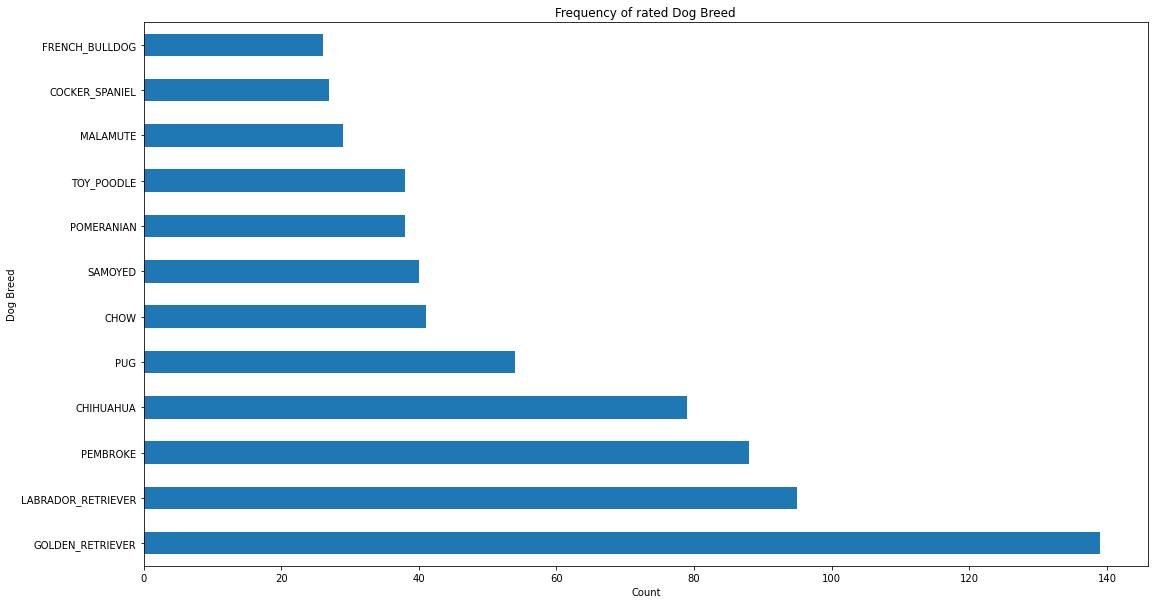

In [545]:
db = twitter_clean.groupby('p1').filter(lambda x: len(x) >= 25)

db['p1'].value_counts().plot(kind = 'barh', figsize=(18, 10))
plt.title('Frequency of rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Dog Breed');
plt.size=(18,10);
plt.savefig("frequency_rated_dog_breed.png")

**Golden Retriever's are the most frequently rated dog breed**

**Analyse the distribution of dog ratings**

In [473]:
twitter_clean[['rating']].describe()

,rating
count,1993.000000
mean,12.215253
std,41.473770
min,0.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,1776.000000


In [496]:
index = twitter_clean.p1.value_counts().index

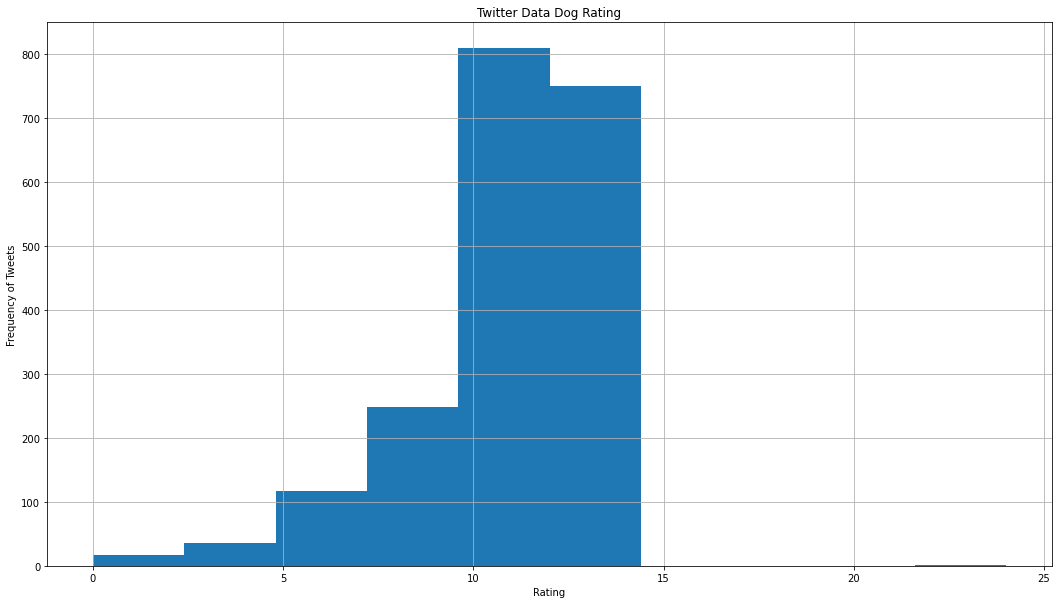

In [546]:
df = twitter_clean[twitter_clean['rating'] < 40]
df['rating'].hist(figsize=(18, 10));
plt.title("Twitter Data Dog Rating");
plt.xlabel("Rating");
plt.ylabel("Frequency of Tweets");
plt.savefig("twitter_ratings.png")

**The ratings are overall positively skewed, i.e. there are little ratings >10 and most of them are grouped between 10 and 25**

**Analyse favourite tweets and retweets**

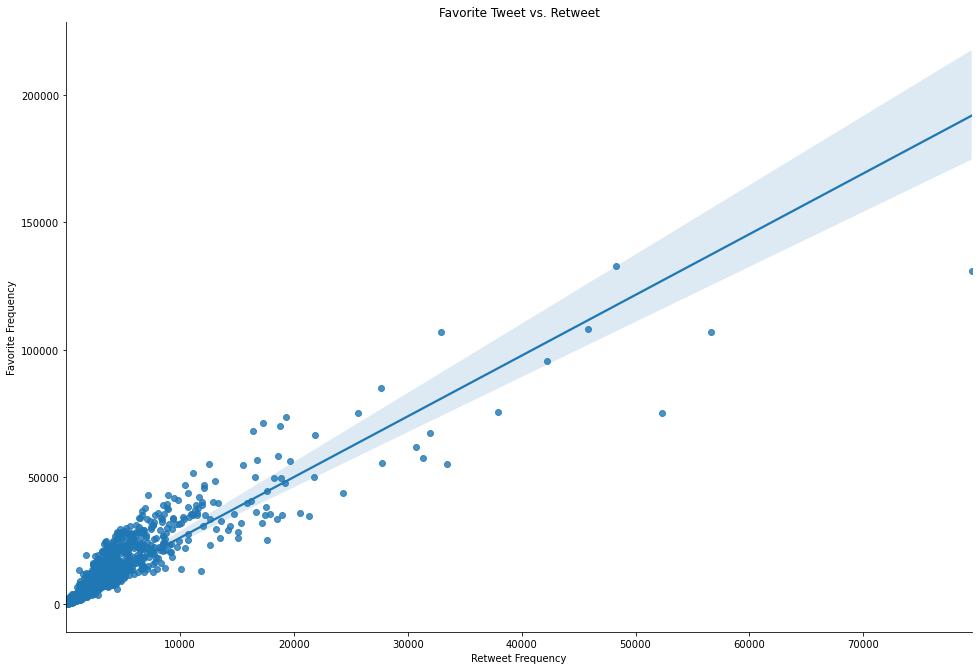

In [544]:
sns.lmplot(x="retweets", 
           y="favorites", 
           data=twitter_clean,
           height = 9,
           aspect=1.5);

plt.title('Favorite Tweet vs. Retweet');
plt.xlabel('Retweet Frequency');
plt.ylabel('Favorite Frequency');
plt.savefig("retweets_favourites.png")

**Favourite tweets are positively correlated with Retweets**